## Classification w/ K Nearest Neighbors Intro

In [3]:
import pandas as pd
import math
import numpy as np
from sklearn import preprocessing, neighbors
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import datetime
import pickle



In [23]:
df = pd.read_csv('breast+cancer+wisconsin+original/breast-cancer-wisconsin.data')
# print(df.head())
# print(df[df.isin(['?'])])

df.replace('?', -9999, inplace=True)

df.drop(["id"], axis=1, inplace=True)
print(df.head())

   clump_thickness  unif_cell_size  unif_cell_shape  marg_adhesion   
0                5               1                1              1  \
1                5               4                4              5   
2                3               1                1              1   
3                6               8                8              1   
4                4               1                1              3   

   single_epith_cell_size bare_nuclei  bland_chrom  norm_nucleoli  mitoses   
0                       2           1            3              1        1  \
1                       7          10            3              2        1   
2                       2           2            3              1        1   
3                       3           4            3              7        1   
4                       2           1            3              1        1   

   class  
0      2  
1      2  
2      2  
3      2  
4      2  


In [31]:
# Data Preprocessing

x = np.array(df.drop('class', axis=1))
y = np.array(df['class'])

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
print(len(x_test), len(x_train), len(y_test), len(y_train))

140 559 140 559


In [32]:
# train model

model = neighbors.KNeighborsClassifier()
model.fit(x_train, y_train)
accuracy = model.score(x_test, y_test)
accuracy

0.9571428571428572

In [40]:
example_measure = np.array([[4,2,1,1,1,2,3,2,1],[4,2,1,3,2,2,3,2,1]])
example_measure = example_measure.reshape(len(example_measure), -1)

prediction = model.predict(example_measure)

prediction

array([2, 2], dtype=int64)

## Creating K Nearest Neighbors Algorithm

2.23606797749979 2.23606797749979


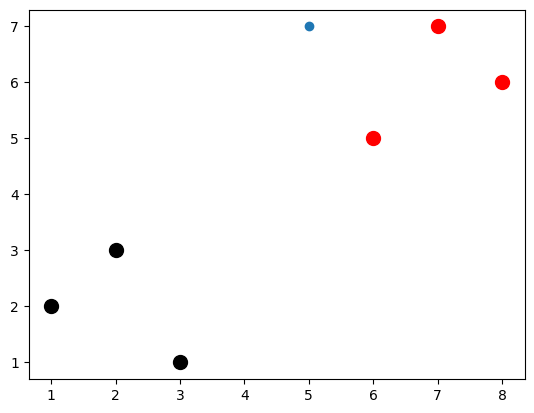

In [53]:
from math import sqrt
import numpy as np
import matplotlib.pyplot as plt
import warnings
from collections import Counter
import pandas as pd
import random

plot1 = [1,3]
plot2 = [2,5]

euclidean_distance = sqrt( (plot1[0] - plot2[0])**2 + (plot1[1] - plot2[1])**2)
euclidean_distance2 = np.sqrt(np.sum( (np.array(plot1) - np.array(plot2))**2))
print(euclidean_distance, euclidean_distance2)

dataset = {'k':[[1,2],[2,3],[3,1]], 'r': [[6,5],[7,7],[8,6]]}
new_features = [5,7]

for i in dataset:
    for ii in dataset[i]:
        plt.scatter(ii[0],ii[1], s=100, color=i)
plt.scatter(new_features[0], new_features[1])


('k', 1.0)


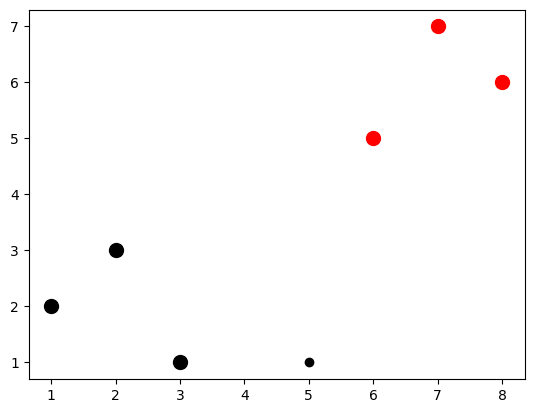

In [80]:
def knn(data, predict, k=3):
    if len(data)>= k:
        warnings.warn('K is set to a value less than total voting groups!')
        
    distances = []
    for group in data:
        for feature in data[group]:
            euclidean_distance = np.linalg.norm(np.array(feature) - np.array(predict))
            distances.append([euclidean_distance, group])
    votes = [i[1] for i in sorted(distances)[:k]]
    # print(Counter(votes).most_common(1))
    vote_result = Counter(votes).most_common(1)[0][0]
    confidence = Counter(votes).most_common(1)[0][1]/k
    
    return vote_result, confidence

new_features = [5,1]
results = knn(dataset, new_features, k=3)
print(results)

for i in dataset:
    for ii in dataset[i]:
        plt.scatter(ii[0],ii[1], s=100, color=i)
plt.scatter(new_features[0], new_features[1], color=results)

In [104]:
accuracies = []

for i in range(25):
    df = pd.read_csv('breast+cancer+wisconsin+original/breast-cancer-wisconsin.data')
    df.replace('?',-9999,inplace=True)
    df.drop(['id'],axis=1,inplace=True)
    df.head()

    full_data = df.astype(float).values.tolist()
    #print(full_data[:3])
    random.shuffle(full_data)
    #print(full_data[:3])

    test_size = 0.4
    train_data = full_data[:-int(test_size*len(full_data))]
    test_data = full_data[-int(test_size*len(full_data)):]

    train_set = {2:[],4:[]}
    test_set = {2:[],4:[]}

    for i in train_data:
        train_set[i[-1]].append(i[:-1])
    for i in test_data:
        test_set[i[-1]].append(i[:-1])  

    correct = 0
    total = 0

    for group in test_set:
        for data in test_set[group]:
            vote, conf = knn(train_set,data,k=5)
            if group == vote:
                correct += 1
            #else:
                #print(conf)
            total += 1
            
    #print('accuracy', correct/total)    
            
    accuracies.append(correct/total)    

print(accuracies)
np.mean(accuracies)

        

[0.9713261648745519, 0.956989247311828, 0.978494623655914, 0.9713261648745519, 0.96415770609319, 0.953405017921147, 0.967741935483871, 0.9713261648745519, 0.967741935483871, 0.9605734767025089, 0.974910394265233, 0.974910394265233, 0.9605734767025089, 0.96415770609319, 0.956989247311828, 0.978494623655914, 0.974910394265233, 0.9605734767025089, 0.953405017921147, 0.956989247311828, 0.978494623655914, 0.953405017921147, 0.96415770609319, 0.96415770609319, 0.985663082437276]


0.9665949820788531

In [108]:
accuracies = []

for i in range(25):
    df = pd.read_csv('breast+cancer+wisconsin+original/breast-cancer-wisconsin.data')
    df.replace('?', -99999, inplace=True)
    df.drop('id',axis=1,inplace=True)

    x = np.array(df.drop(['class'],axis=1))
    y = np.array(df['class'])

    x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

    model = neighbors.KNeighborsClassifier(n_jobs=-1, n_neighbors=5)
    model.fit(x_train,y_train)

    accuracy = model.score(x_test, y_test)

    accuracies.append(accuracy)
    
print(accuracies)
np.mean(accuracies)


[0.9571428571428572, 0.9714285714285714, 0.9357142857142857, 0.9785714285714285, 0.9714285714285714, 0.9714285714285714, 0.9857142857142858, 0.9785714285714285, 0.9714285714285714, 0.9642857142857143, 0.95, 0.9714285714285714, 0.9571428571428572, 0.9785714285714285, 0.9857142857142858, 0.9714285714285714, 0.9642857142857143, 0.9428571428571428, 0.9785714285714285, 0.9857142857142858, 0.9785714285714285, 0.9857142857142858, 0.95, 0.9642857142857143, 0.9928571428571429]


0.9697142857142858